Primer Algoritmo Random Forest

Precisión del modelo: 0.97


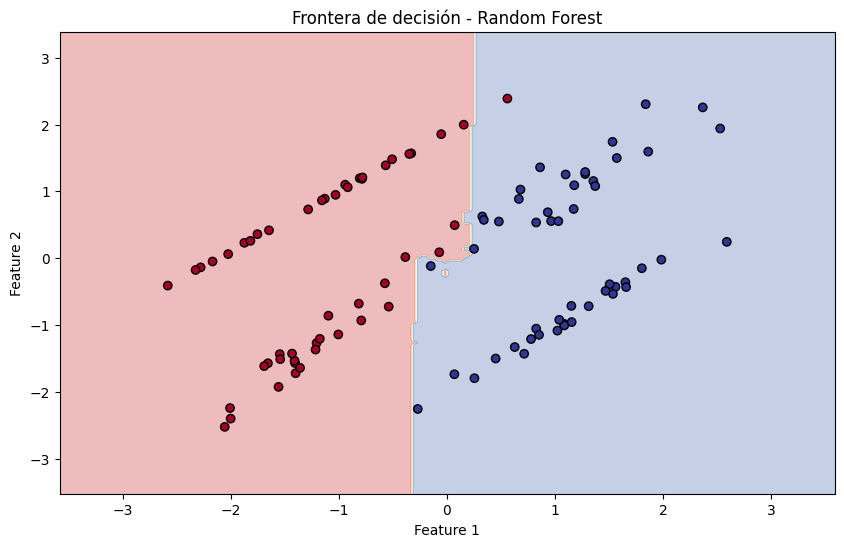

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generar datos sintéticos
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

# Dividir entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo Random Forest
clf = RandomForestClassifier(
    n_estimators=100,     # número de árboles, mas arboles, mas lento pero mejor
    max_depth=5,          # profundidad máxima de cada árbol
    random_state=42
)
clf.fit(X_train, y_train)

# Predecir y evaluar precisión
y_pred = clf.predict(X_test)
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")

# Graficar la frontera de decisión
# Crear una malla para visualizar la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title("Frontera de decisión - Random Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


En el modelo generado, si vemos que la frontera es suave, el modelo esta generalizando bien. Si es muy dentada o muy ajustada a los datos, puede estar sobreajustando (overfitting)
También podemos observar algunos errores, los puntos rojos en la zona azul, y viceversa.
También nos grafica la separabilidad del problema.

La forma de la frontera también nos muestra cómo el modelo decide en qué clase cae cada punto según su posición en el espacio de features.